In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve, gaussian_filter
from PIL import Image

In [35]:
def generateFilter(dimension):
    filter = np.zeros((dimension, dimension))
    for i in range(dimension):
        for j in range(dimension):
            filter[i][j] = 1 / (dimension ** 2)
    
    print(filter)
    return filter

In [36]:
def edge_detection(image_path, apply_blur=False, filter_size=3):
    
    image = Image.open(image_path).convert('L')
    
    width, height = image.size
    resolution = (width, height)
    
    image_np = np.array(image).astype('float32') / 255.0
    
    if apply_blur:
        image_np = gaussian_filter(image_np, sigma=2)
    
    if filter_size == 3:
        vertical_filter = np.array([[-1, 0, 1],
                                    [-1, 0, 1],
                                    [-1, 0, 1]])

        horizontal_filter = np.array([[-1, -1, -1],
                                      [ 0,  0,  0],
                                      [ 1,  1,  1]])
    elif filter_size == 5:
        vertical_filter = np.array([[-1, -2, 0, 2, 1],
                                    [-1, -2, 0, 2, 1],
                                    [-1, -2, 0, 2, 1],
                                    [-1, -2, 0, 2, 1],
                                    [-1, -2, 0, 2, 1]])

        horizontal_filter = np.array([[-1, -1, -1, -1, -1],
                                      [-2, -2, -2, -2, -2],
                                      [ 0,  0,  0,  0,  0],
                                      [ 2,  2,  2,  2,  2],
                                      [ 1,  1,  1,  1,  1]])
    
    vertical_edges = convolve(image_np, vertical_filter)
    horizontal_edges = convolve(image_np, horizontal_filter)
    
    vertical_edges = (vertical_edges - vertical_edges.min()) / (vertical_edges.max() - vertical_edges.min())
    horizontal_edges = (horizontal_edges - horizontal_edges.min()) / (horizontal_edges.max() - horizontal_edges.min())
    
    return vertical_edges, horizontal_edges, image_np, resolution

In [37]:
def plot_images(image1_results, image1_name):
    
    vertical_edges1, horizontal_edges1, original_image1, resolution1 = image1_results
    
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 3, 1)
    plt.imshow(original_image1, cmap='gray')
    plt.title(f'Original Image: {image1_name} \n Resolution: {resolution1}')
    plt.axis('off')
    
    plt.subplot(2, 3, 2)
    plt.imshow(vertical_edges1, cmap='gray')
    plt.title(f'Vertical Edges: {image1_name}')
    plt.axis('off')
    
    plt.subplot(2, 3, 3)
    plt.imshow(horizontal_edges1, cmap='gray')
    plt.title(f'Horizontal Edges: {image1_name}')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

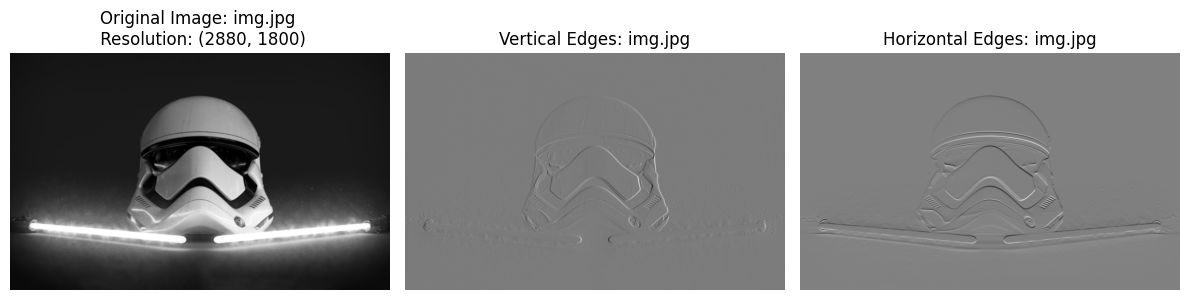

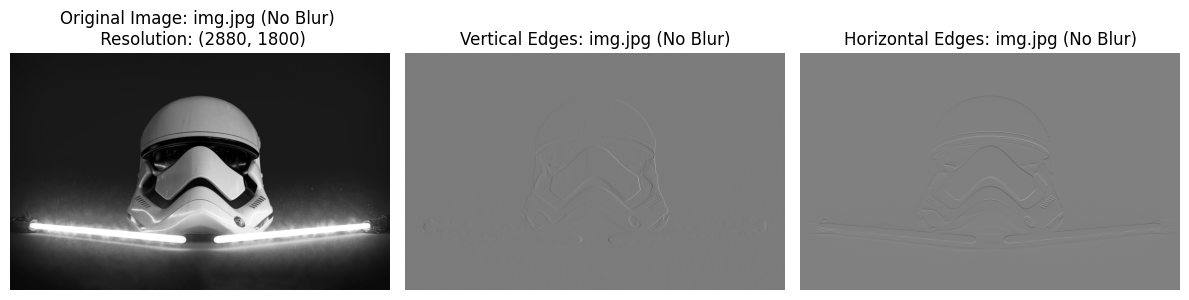

In [40]:
image1Name = 'img.jpg'
image1_results = edge_detection(image1Name, apply_blur=True, filter_size=5)
plot_images(image1_results, image1Name)
image1Name = 'img.jpg'
image1_results = edge_detection(image1Name, apply_blur=False, filter_size=3)
plot_images(image1_results, image1Name + ' (No Blur)')

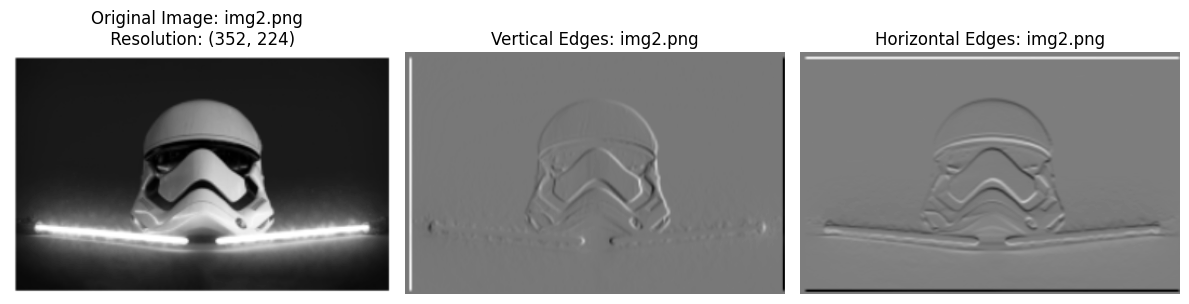

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]
[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

In [39]:
image2Name = 'img2.png'
image2_results = edge_detection(image2Name, apply_blur=False, filter_size=3)
plot_images(image2_results, image2Name)
generateFilter(3)
generateFilter(5)